In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ast import literal_eval
import seaborn as sns

model_data = pd.read_csv("data/example_scenarios.csv", converters={'Global quantities': literal_eval, 'token values': literal_eval})
model_data = model_data[model_data['G'] == 1]
model_data = model_data[model_data['r'] == 0]

#model_data_G = pd.read_csv("example_scenarios_G_impact.csv", converters={'Global quantities': literal_eval, 'token values': literal_eval})

model_data
#sort after cases

#model_data = model_data[model_data['step'] ]
# agent_data = pd.read_csv("agent_data.csv")
# model_data = pd.read_csv("model_data.csv")

,Unnamed: 0,Agents,Global quantities,token account,num trades,num mining,mean global needs,mean currency needs,r,c,m,G,s,step,"c1, ..., cG","N,G,m,s,c",global thresholds,token thresholds
0,0,100,[1000.0],[10.0],0,0,[0.0],[0.0],0,1.5,1.0,1,0.5,0,[1.5],"[100, 1, 1.0, 0.5, 1.5]",2000,10
1,1,100,[1150.0],[9.5],0,99,[0.0],[0.0],0,1.5,1.0,1,0.5,1,[1.5],"[100, 1, 1.0, 0.5, 1.5]",2000,10
2,2,100,[1201.0],[9.99],0,0,[0.0],[0.5],0,1.5,1.0,1,0.5,2,[1.5],"[100, 1, 1.0, 0.5, 1.5]",2000,10
3,3,100,[1351.0],[9.49],0,99,[0.0],[0.01],0,1.5,1.0,1,0.5,3,[1.5],"[100, 1, 1.0, 0.5, 1.5]",2000,10
4,4,100,[1402.0],[9.98],0,1,[0.0],[0.51],0,1.5,1.0,1,0.5,4,[1.5],"[100, 1, 1.0, 0.5, 1.5]",2000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,45,100,[0.0],[6.5],0,99,[0.0],[3.2],0,0.2,1.0,1,0.5,45,[0.2],"[100, 1, 1.0, 0.5, 0.2]",2000,10
1796,46,100,[0.0],[6.2],0,79,[0.0],[3.5],0,0.2,1.0,1,0.5,46,[0.2],"[100, 1, 1.0, 0.5, 0.2]",2000,10
1797,47,100,[0.0],[5.9],0,99,[0.0],[3.8],0,0.2,1.0,1,0.5,47,[0.2],"[100, 1, 1.0, 0.5, 0.2]",2000,10
1798,48,100,[0.0],[5.6],0,79,[0.0],[4.1],0,0.2,1.0,1,0.5,48,[0.2],"[100, 1, 1.0, 0.5, 0.2]",2000,10


## evolution of one global quantitiy

[100, 1, 1.0, 0.5, 1.5]
(50, 1)
[100, 1, 1.0, 1.5, 1.5]
(50, 1)
[100, 1, 1.0, 0.5, 1.0]
(50, 1)
[100, 1, 1.0, 1.0, 1.0]
(50, 1)
[100, 1, 1.0, 0.2, 0.5]
(50, 1)
[100, 1, 1.0, 0.5, 0.5]
(50, 1)
[100, 1, 1.0, 1.5, 0.5]
(50, 1)
[100, 1, 1.0, 0.5, 0.2]
(50, 1)


<>:62: SyntaxWarning: invalid escape sequence '\g'
<>:62: SyntaxWarning: invalid escape sequence '\g'
/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_55673/3901286456.py:62: SyntaxWarning: invalid escape sequence '\g'
  ax.plot(np.arange(0,xmax), np.full(xmax, 2000), c='black', label='Desired threshold $\gamma$', ls='dashed', alpha=0.5)


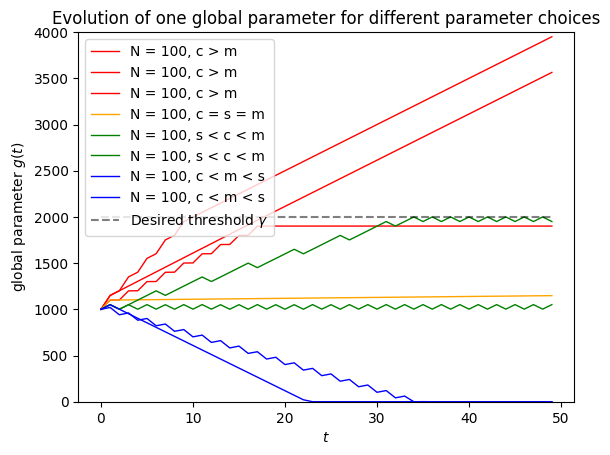

In [11]:
case_data = model_data.groupby('N,G,m,s,c', sort=False)
fig, ax = plt.subplots()

# color per comb. of m,s,c
# linestyle per num agents
colors = ['blue', 'green', 'orange', 'red']
ls = ['dashed', 'dotted']
cols = ['blue', 'black']

for case, df in case_data:
    print(case)
    params = literal_eval(case)
    N = params[0]
    G = params[1]
    m = params[2]
    s = params[3]
    c = params[4]

    if c < m and m < s:
        lab = 'c < m < s'
        col = colors[0]

    elif c < m and s < c:
        lab = 's < c < m'
        col = colors[1]

    elif c == m and s == m:
        lab = 'c = s = m'
        col = colors[2]

    elif c > m:
        lab = 'c > m'
        col = colors[3]
   

    ls = 'solid'
    #get linestyle and color:
    if params[0] != 100: # not 100 agents
        ls='dashed'


    #print(df['Agents'])
    

    for rep, rep_df in df.groupby('r'):
        #if rep == 0:
        #plot q_evol
        q_evol = np.array(rep_df["Global quantities"].to_list())
        #q_evol = np.sum(q_evol, axis=1)
        print(q_evol.shape)
        if rep == 0:
            ax.plot(rep_df["step"], q_evol, label='N = ' + str(N) + ', ' + lab, linewidth=1, ls=ls, c=col)
        else: 
            ax.plot(rep_df["step"], q_evol, linewidth=2, ls=ls, c=col)


#plot a line at threshold

xmax = 50
ax.set(ylim=[0, 4000], ylabel='global parameter $g(t)$', xlabel='$t$')

ax.plot(np.arange(0,xmax), np.full(xmax, 2000), c='black', label='Desired threshold $\gamma$', ls='dashed', alpha=0.5)

ax.set(title='Evolution of one global parameter for different parameter choices')

plt.legend()


[100, 1, 1.0, 0.5, 1.5]
(50, 1)
[100, 1, 1.0, 1.5, 1.5]
(50, 1)
[100, 1, 1.0, 0.5, 1.0]
(50, 1)
[100, 1, 1.0, 1.0, 1.0]
(50, 1)
[100, 1, 1.0, 0.2, 0.5]
(50, 1)
[100, 1, 1.0, 0.5, 0.5]
(50, 1)
[100, 1, 1.0, 1.5, 0.5]
(50, 1)
[100, 1, 1.0, 0.5, 0.2]
(50, 1)


<>:98: SyntaxWarning: invalid escape sequence '\g'
<>:98: SyntaxWarning: invalid escape sequence '\g'
/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_55673/1504132605.py:98: SyntaxWarning: invalid escape sequence '\g'
  ax.plot(np.arange(0,xmax+1), np.full(xmax+1, 2000), c='black', label='Desired threshold $\gamma$', linewidth=0.5)


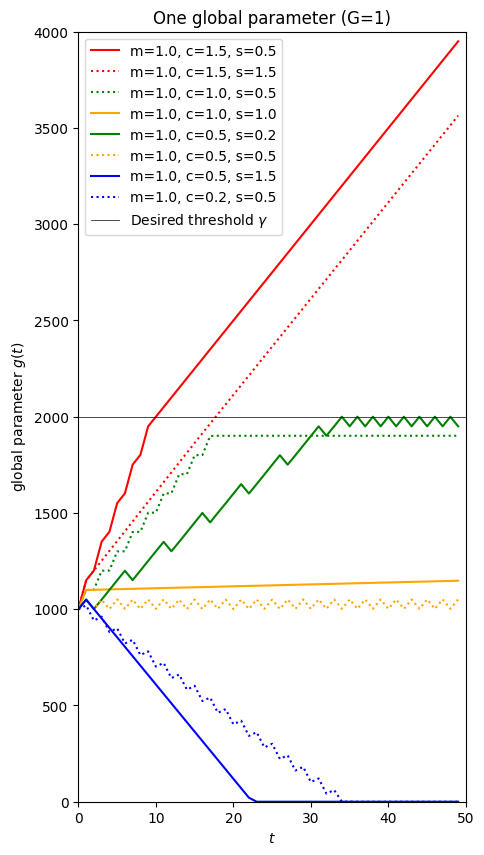

In [12]:
case_data = model_data.groupby('N,G,m,s,c', sort=False)
fig, ax = plt.subplots(figsize=(5,10))

# color per comb. of m,s,c
# linestyle per num agents
colors = ['blue', 'green', 'orange', 'red'] # s > c and m > c: col=blue, s < c and m < c: col 
lstyles = ['dashed', 'dotted', 'solid'] # dashed if stable, solid if unstable
cols = ['blue', 'black']

for case, df in case_data:
    print(case)
    params = literal_eval(case)
    N = params[0]
    G = params[1]
    m = params[2]
    s = params[3]
    c = params[4]

    lab = "m=" + str(m) + ", c=" + str(c) + ", s=" + str(s)
    col = -1
    ls = 'solid'
    # if c > s:
    #     ls = 'solid'
    # elif c <= s:
    #     ls = 'dashed'
    # # elif c == s:
    # #     ls = 'dotted'

    if c > m:
        col = 'red'
        if s == c:
            ls = 'dotted'
    elif c <= m and s < c:
        col = 'green'
        if c == m:
            ls = 'dotted'
    elif c <= m and s == c:
        col = 'orange'
        if c < m:
            ls = 'dotted'

    elif c <= m and s > c:
        col = 'blue'
        if s < m:
            ls = 'dotted'

    
    

    

    # if c < m and c < s:
    #     #lab = 'c < m < s'
    #     col = colors[0]

        
    # elif c < m:
    #     #lab = 's < c < m'
    #     col = colors[1]

    # elif c > m:
    #     col = colors[3]




    # elif c == m and s == m:
    #     lab = 'c = s = m'

   

    #ls = 'solid'
    # #get linestyle and color:
    # if params[0] != 100: # not 100 agents
    #     ls='dashed'


    #print(df['Agents'])
    

    for rep, rep_df in df.groupby('r'):
        #if rep == 0:
        #plot q_evol
        q_evol = np.array(rep_df["Global quantities"].to_list())
        #q_evol = np.sum(q_evol, axis=1)
        print(q_evol.shape)
        if rep == 0:
            ax.plot(rep_df["step"], q_evol, label = lab, linewidth=1.5, ls=ls, c=col)
        else: 
            ax.plot(rep_df["step"], q_evol, linewidth=1.5, ls=ls, c=col)


#plot a line at threshold
# xmax = 50 # for all agents same threshold
xmax = 50 # for randomly distributed thresholds
ax.set(ylim=[0, 4000], xlim=[0, xmax], ylabel='global parameter $g(t)$', xlabel='$t$')

ax.plot(np.arange(0,xmax+1), np.full(xmax+1, 2000), c='black', label='Desired threshold $\gamma$', linewidth=0.5)

ax.set(title='One global parameter (G=1)')

plt.legend()


## G=1 random thresholds
All qualitative behaviors over time for systems with one Global parameter and normally distributed thresholds $\gamma$ among the agents with mean 2000 and variance 300. 

In [13]:

model_data = pd.read_csv("data/example_scenarios_randGamma_highInitLevel.csv", converters={'Global quantities': literal_eval, 'token values': literal_eval})
#model_data = pd.read_csv("example_scenarios_randGamma.csv", converters={'Global quantities': literal_eval, 'token values': literal_eval})


model_data = model_data[model_data['G'] == 1]

#model_data
model_data["gamma max"].to_numpy()[0]


np.float64(2600.7177750935766)

[100, 1, 1.0, 0.5, 1.5]
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
[100, 1, 1.0, 1.5, 1.5]
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
[100, 1, 1.0, 0.5, 1.0]
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
[100, 1, 1.0, 1.0, 1.0]
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
[100, 1, 1.0, 0.2, 0.5]
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
[100, 1, 1.0, 0.5, 0.5]
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
[100, 1, 1.0, 1.5, 0.5]
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
[100, 1, 1.0, 0.5, 0.2]
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)


<>:74: SyntaxWarning: invalid escape sequence '\g'
<>:74: SyntaxWarning: invalid escape sequence '\g'
/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_55673/200845552.py:74: SyntaxWarning: invalid escape sequence '\g'
  ax.plot(np.arange(0,xmax+1), np.full(xmax+1, 2000), c='black', label='mean threshold $\gamma$', linewidth=0.5)


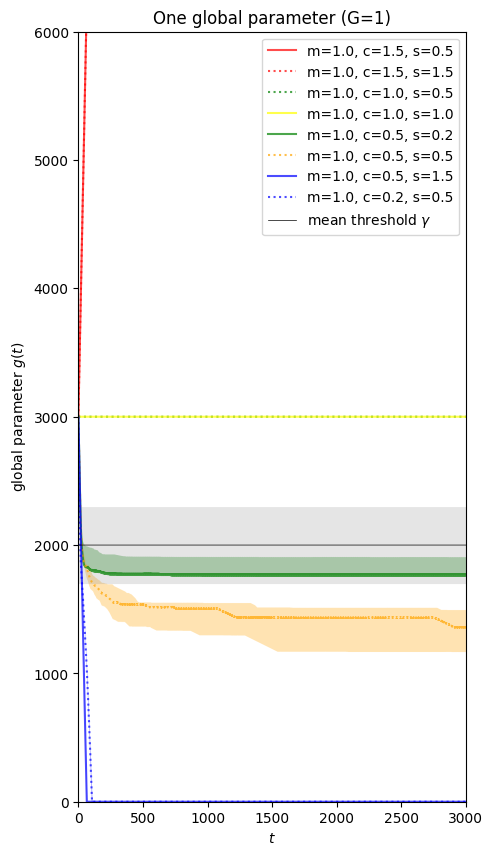

In [14]:
case_data = model_data #model_data[model_data['r'] == 1]
case_data = case_data.groupby('N,G,m,s,c', sort=False)
fig, ax = plt.subplots(figsize=(5,10))

for case, df in case_data:
    print(case)
    params = literal_eval(case)
    N = params[0]
    G = params[1]
    m = params[2]
    s = params[3]
    c = params[4]

    lab = "m=" + str(m) + ", c=" + str(c) + ", s=" + str(s)
    col = -1
    ls = 'solid'
    # if c > s:
    #     ls = 'solid'
    # elif c <= s:
    #     ls = 'dashed'
    # # elif c == s:
    # #     ls = 'dotted'

    if c > m:
        col = 'red'
        if s == c:
            ls = 'dotted'
    elif c <= m and s < c:
        col = 'green'
        if c == m:
            ls = 'dotted'
    elif c <= m and s == c:
        col = 'yellow'
        if c < m:
            ls = 'dotted'
            col = 'orange'

    elif c <= m and s > c:
        col = 'blue'
        if s < m:
            ls = 'dotted'

    
    maxvals = []
    minvals = []

    for rep, rep_df in df.groupby('r'):
        #if rep == 0:
        #plot q_evol
        q_evol = np.array(rep_df["Global quantities"].to_list())
        #q_evol = np.sum(q_evol, axis=1)
        print(q_evol.shape)
        if rep == 0:
            ax.plot(rep_df["step"], q_evol, label = lab, linewidth=1.5, ls=ls, c=col, alpha=0.7)
            maxvals = q_evol
            minvals = q_evol
        else: 
            #elem. wise max/min
            maxvals = np.maximum(maxvals, q_evol)
            minvals = np.minimum(minvals, q_evol)
            #print(maxvals[:,0])
    #if (len(maxvals) > 1):
            #if (col=='orange'):
            #    ax.plot(rep_df["step"], q_evol, linewidth=1.5, ls=ls, c=col, alpha=0.5)
    ax.fill_between(np.arange(0,len(maxvals[:,0])), minvals[:,0], maxvals[:,0], alpha=0.3, color=col, linewidth=0)



#plot a line at threshold
# xmax = 50 # for all agents same threshold
xmax = 3000 # for randomly distributed thresholds
ax.set(ylim=[0, 6000], xlim=[0, xmax], ylabel='global parameter $g(t)$', xlabel='$t$')
var = 300
ax.plot(np.arange(0,xmax+1), np.full(xmax+1, 2000), c='black', label='mean threshold $\gamma$', linewidth=0.5)
ax.fill_between(np.arange(0,xmax+1), np.full(xmax+1, 2000 + var), np.full(xmax+1, 2000 - var), alpha=0.2, color="grey", linewidth=0)
#ax.fill_between(np.arange(0,xmax+1), np.full(xmax+1, 2000 + 2*var), np.full(xmax+1, 2000 - 2*var), alpha=0.3, color="grey")


ax.set(title='One global parameter (G=1)')
plt.legend()


## Impact of number of global parameters

<>:47: SyntaxWarning: invalid escape sequence '\g'
<>:47: SyntaxWarning: invalid escape sequence '\g'
/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_55673/1792818676.py:47: SyntaxWarning: invalid escape sequence '\g'
  ax.plot(np.arange(0,xmax), np.full(xmax, 1000), c='black', label='Desired threshold $\gamma$', ls='dashed')


[100, 2, 1.0, 0.0, 0.25]
(60, 300)
(18000,)
(18000,)
[100, 3, 1.0, 0.0, 0.25]
(90, 300)
(27000,)
(27000,)
[100, 4, 1.0, 0.0, 0.25]
(120, 300)
(36000,)
(36000,)
[100, 5, 1.0, 0.0, 0.25]
(150, 300)
(45000,)
(45000,)
[100, 6, 1.0, 0.0, 0.25]
(180, 300)
(54000,)
(54000,)


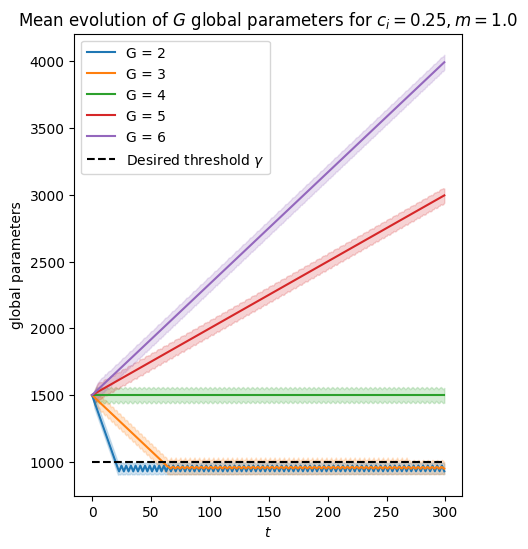

In [15]:

model_data_G = pd.read_csv("data/example_scenarios_G_impact.csv", converters={'Global quantities': literal_eval, 'token values': literal_eval})

case_data = model_data_G.groupby('N,G,m,s,c', sort=False)
fig, ax = plt.subplots(figsize=(5,6))

# color per comb. of m,s,c
# linestyle per num agents
colors = ['blue', 'green', 'orange', 'red', 'purple', 'yellow']
ls = ['dashed', 'dotted']
cols = ['blue', 'black']

col = 0

for case, df in case_data:
    print(case)
    params = literal_eval(case)
    N = params[0]
    G = params[1]
    m = params[2]
    s = params[3]
    c = params[4]


    steps = []
    qvals = []

    for rep, rep_df in df.groupby('r'):
        q_evol = np.array(rep_df["Global quantities"].to_list())

        for i in range(G):
            steps.append(rep_df["step"].to_list())
            qvals.append(q_evol[:,i])

    shape = np.array(steps).shape
    print(shape)
    step_array = np.reshape(steps, shape[0]*shape[1])
    q_array = np.reshape(qvals, shape[0]*shape[1])

    print(step_array.shape)
    print(q_array.shape)
    sns.lineplot(ax=ax, x=step_array, y=q_array, errorbar=('pi',100), label='G = ' + str(G))



ax.set( ylabel='global parameters', xlabel='$t$')
xmax = 300
ax.plot(np.arange(0,xmax), np.full(xmax, 1000), c='black', label='Desired threshold $\gamma$', ls='dashed')

ax.set(title='Mean evolution of $G$ global parameters for $c_i = 0.25, m = 1.0$')

plt.legend()

#plot a line at threshold

# xmax = 100
# ax.set(xlim=[0, xmax], ylabel='global parameters', xlabel='$t$')

# ax.plot(np.arange(0,xmax), np.full(xmax, 2000), c='black', label='Desired threshold', ls='dashed')

# ax.set(title='Evolution of $G$ global parameters for $N = 100, s = 0.1, c = 0.25, m = 1.0$')

# plt.legend()


### difference in trajectories multiple global parameters compared to 1 global parameter

<>:39: SyntaxWarning: invalid escape sequence '\g'
<>:39: SyntaxWarning: invalid escape sequence '\g'
/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_55673/288587977.py:39: SyntaxWarning: invalid escape sequence '\g'
  ax[0].plot(np.arange(0,xmax), np.full(xmax, 2000), c='black', label='$\gamma$', ls='dashed')


      Unnamed: 0  Agents                         Global quantities  \
0              0     100  [1000.0, 1000.0, 1000.0, 1000.0, 1000.0]   
1              1     100     [987.0, 985.0, 996.0, 1003.0, 1010.0]   
2              2     100     [971.0, 979.0, 998.0, 1006.0, 1025.0]   
3              3     100     [955.0, 976.0, 994.0, 1016.0, 1035.0]   
4              4     100     [945.0, 974.0, 996.0, 1012.0, 1049.0]   
...          ...     ...                                       ...   
3995        3995     100      [20.0, 40.0, 1958.0, 1959.0, 1919.0]   
3996        3996     100       [0.0, 15.0, 1973.0, 1979.0, 1949.0]   
3997        3997     100        [0.0, 0.0, 1988.0, 1999.0, 1979.0]   
3998        3998     100       [5.0, 10.0, 2003.0, 1919.0, 2009.0]   
3999        3999     100      [10.0, 20.0, 2018.0, 1939.0, 1939.0]   

                                          token account  num trades  \
0                             [0.0, 0.0, 0.0, 0.0, 0.0]           0   
1     [0.15000000

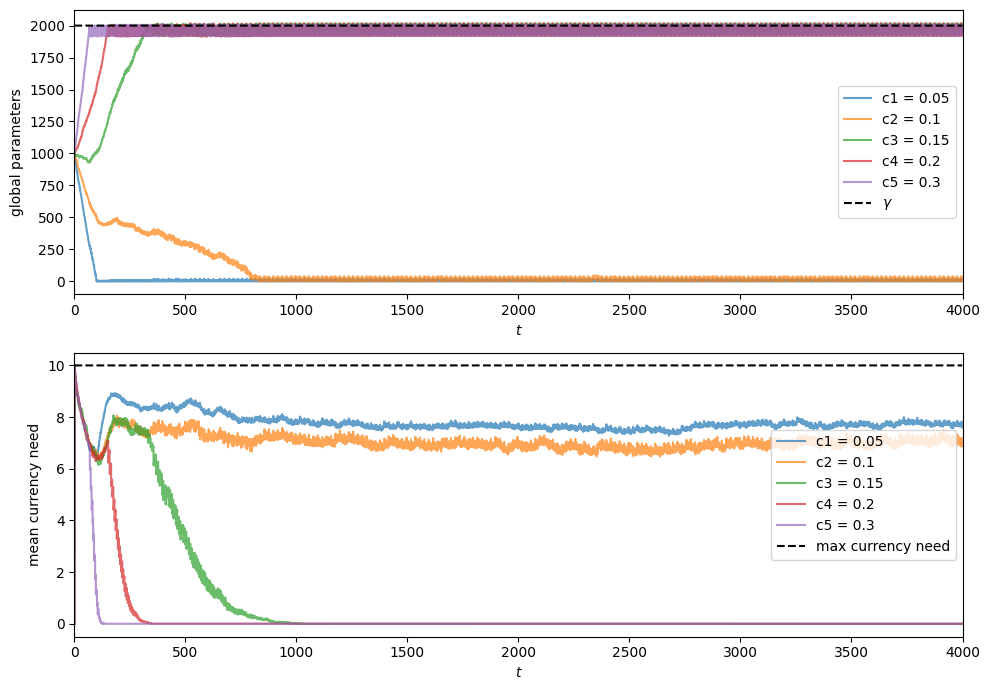

In [16]:
#stable case
c_values = [0.05, 0.1, 0.15, 0.2, 0.3]
model_data = pd.read_csv("data/case_G=5_c=0.8.csv", converters={'Global quantities': literal_eval, 'token account': literal_eval, 'mean global needs': literal_eval, 'mean currency needs': literal_eval})
model_data = model_data[model_data['r'] == 0]
print(model_data)
q_evol = np.array(model_data["Global quantities"].to_list())
q_needs = np.array(model_data["mean global needs"].to_list())
c_needs = np.array(model_data["mean currency needs"].to_list())
t_evol = np.array(model_data["token account"].to_list())
q_evol.shape
print(q_evol.shape[0])
q_evol[:100,]
#plt.plot(np.arange(q_evol.shape[0]), q_evol)

fig, ax = plt.subplots(2, 1, figsize=(10,7))
#fig2, ax2 = plt.subplots(figsize=(10,3))

for i in range(5):
    ax[0].plot(np.arange(q_evol.shape[0]), q_evol[:,i], label = "c" +str(i+1) + " = " + str(c_values[i]), alpha=0.7)
    ax[1].plot(np.arange(q_needs.shape[0]), c_needs[:,i], label = "c" +str(i+1) + " = " + str(c_values[i]), alpha=0.7)



# qns = []
# ts = []
# paramIdx = []
# for t in range(q_evol.shape[0]):
#     for i in range(5):
#         ts.append(t)
#         qns.append(q_needs[t,i])
#         paramIdx.append(i)

#sns.lineplot(x=ts, y=qns, ax=ax2)

ax[0].set(ylabel="global parameters", xlabel = "$t$")
ax[1].set(ylabel="mean currency need", xlabel = "$t$")

xmax = 4000
ax[0].plot(np.arange(0,xmax), np.full(xmax, 2000), c='black', label='$\gamma$', ls='dashed')
ax[1].plot(np.arange(0,xmax), np.full(xmax, 10), c='black', label='max currency need', ls='dashed')
ax[0].set(xlim=[0,xmax])
ax[1].set(xlim=[0,xmax])
#compute steepness:
ax[0].legend()
ax[1].legend(loc='right')
fig.tight_layout()
print ((q_evol[q_evol.shape[0]-1] - q_evol[0]) / q_evol.shape[0])

<>:16: SyntaxWarning: invalid escape sequence '\g'
<>:16: SyntaxWarning: invalid escape sequence '\g'
/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_55673/839790059.py:16: SyntaxWarning: invalid escape sequence '\g'
  ax.plot(np.arange(0,xmax), np.full(xmax, 2000), c='black', label='$\gamma$', ls='dashed')


4000
[-0.2475  -0.245    0.2545   0.23475  0.23475]


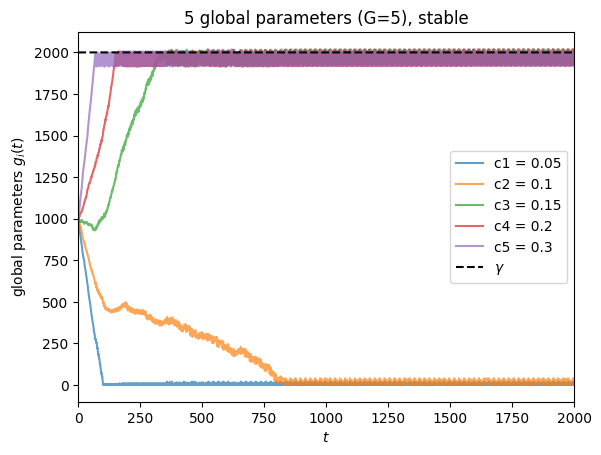

In [17]:
#stable case
c_values = [0.05, 0.1, 0.15, 0.2, 0.3]
model_data = pd.read_csv("data/case_G=5_c=0.8.csv", converters={'Global quantities': literal_eval, 'token account': literal_eval, 'mean global needs': literal_eval, 'mean currency needs': literal_eval})
model_data = model_data[model_data['r'] == 0]
q_evol = np.array(model_data["Global quantities"].to_list())
q_evol.shape
print(q_evol.shape[0])
q_evol[:100,]
#plt.plot(np.arange(q_evol.shape[0]), q_evol)
xmax = 4000
fix, ax = plt.subplots()
for i in range(5):
    ax.plot(np.arange(q_evol.shape[0]), q_evol[:,i], label = "c" + str(i+1) + " = " + str(c_values[i]), alpha=0.7)
ax.set(ylabel="global parameters $g_i(t)$", xlabel = "$t$", title= "5 global parameters (G=5), stable")
ax.set(xlim=[0,2000])
ax.plot(np.arange(0,xmax), np.full(xmax, 2000), c='black', label='$\gamma$', ls='dashed')

#compute steepness:
plt.legend()
print ((q_evol[q_evol.shape[0]-1] - q_evol[0]) / q_evol.shape[0])

4000
[4.87425 6.3175  6.315   6.30225 6.31525]


<>:16: SyntaxWarning: invalid escape sequence '\g'
<>:16: SyntaxWarning: invalid escape sequence '\g'
/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_55673/2926667167.py:16: SyntaxWarning: invalid escape sequence '\g'
  ax.plot(np.arange(0,xmax), np.full(xmax, 2000), c='black', label='$\gamma$', ls='dashed')


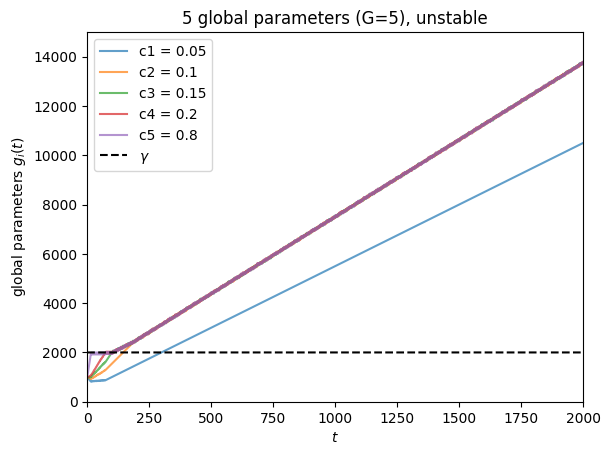

In [18]:
#unstable case
c_values = [0.05, 0.1, 0.15, 0.2, 0.8]
model_data = pd.read_csv("data/case_G=5_c=1.3.csv", converters={'Global quantities': literal_eval, 'token values': literal_eval})
model_data = model_data[model_data['r'] == 0]
q_evol = np.array(model_data["Global quantities"].to_list())
q_evol.shape
print(q_evol.shape[0])
q_evol[:100,]
#plt.plot(np.arange(q_evol.shape[0]), q_evol)
xmax = 4000
fix, ax = plt.subplots()
for i in range(5):
    ax.plot(np.arange(q_evol.shape[0]), q_evol[:,i], label = "c" + str(i+1) + " = " + str(c_values[i]), alpha=0.7)
ax.set(ylabel="global parameters $g_i(t)$", xlabel = "$t$", title="5 global parameters (G=5), unstable")
ax.set(xlim=[0,2000], ylim=[0,15000])
ax.plot(np.arange(0,xmax), np.full(xmax, 2000), c='black', label='$\gamma$', ls='dashed')

#compute steepness:
plt.legend()
print ((q_evol[q_evol.shape[0]-1] - q_evol[0]) / q_evol.shape[0])

In [19]:
from scipy import stats

def slopes(q_evol, tmin):
    #print(q_evol.shape)
    n = q_evol.shape[0]
    G = q_evol.shape[1]
    #print(n, G)

    slope_vals_original = []
    p_vals = []
    slope_vals = []
    variance = []
    for i in range(G):
        slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(0,n), q_evol[tmin:,i])

        #lm = np.polyfit(np.arange(0,n), q_evol[:,i],1)
        #a = np.polyfit(np.arange(0,n), q_evol[:,i],1)[0]
        #print(a)
        #if slope > -tol and slope < tol:
        #    slope = 0.0 #set the slope exactly to 0, because very high fluctuations around steady state
        slope_vals_original.append(slope) 
        p_vals.append(p_value)
        variance.append(std_err)
        if p_value > 0.05:
            slope_vals.append(0.0)
        else:
            slope_vals.append(slope)


    return slope_vals, slope_vals_original, p_vals, variance


In [20]:
### compute the slopes of the lines:
N = 100
tmin = 1000
G = 5
m = 1.0
actual_slopes = np.zeros(G)
for i in range(G):
        slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(0,q_evol[tmin:,i].shape[0]), q_evol[tmin:,i])
        actual_slopes[i] = slope


print(actual_slopes/N) # actual increase factor 
print(sum(actual_slopes/N))
print(c_values) # max increase factors
print((np.sum(c_values)- 1.0) / G)
print((np.sum(c_values)- 1.0))

#k=2
print((np.sum(c_values)- 1.0 - 0.05)/(G-1))
#minimal slope: sum(c) - m

#k=1
print((np.sum(c_values)- 1.0 - 0.05)/(G-1))

### mining frequency: correct
mFreq = c_values - actual_slopes/N
print(mFreq)
print(sum(mFreq))


[0.05       0.06248721 0.06250777 0.06250244 0.06250258]
0.30000000000000004
[0.05, 0.1, 0.15, 0.2, 0.8]
0.06000000000000001
0.30000000000000004
0.06250000000000001
0.06250000000000001
[0.         0.03751279 0.08749223 0.13749756 0.73749742]
1.0


<>:40: SyntaxWarning: invalid escape sequence '\g'
<>:40: SyntaxWarning: invalid escape sequence '\g'
/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_55673/2490170100.py:40: SyntaxWarning: invalid escape sequence '\g'
  ax.plot(np.arange(0,xmax), np.full(xmax, 2000), c='black', label='$\gamma$', ls='dashed')


Index(['Unnamed: 0', 'Agents', 'Global quantities', 'token account',
       'num trades', 'num mining', 'mean global needs', 'mean currency needs',
       'r', 'c', 'm', 'G', 's', 'step', 'c1, ..., cG', 'N,G,m,s,c',
       'global thresholds', 'token thresholds'],
      dtype='object')
4000
[4.87425 6.3175  6.315   6.30225 6.31525]


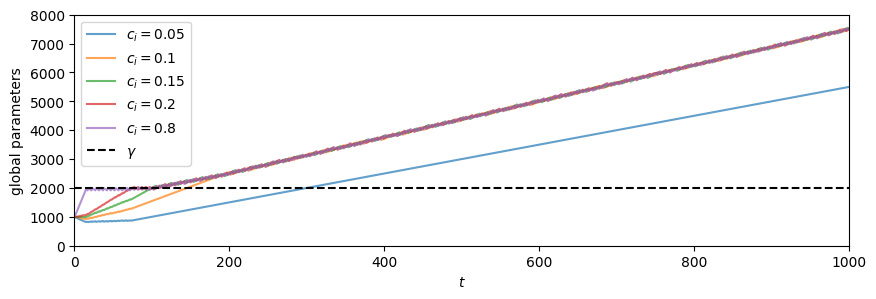

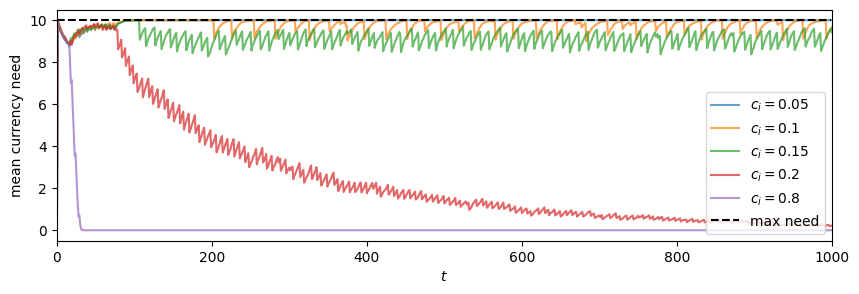

In [21]:
#stable case
c_values = [0.05, 0.1, 0.15, 0.2, 0.8]
model_data = pd.read_csv("data/case_G=5_c=1.3.csv", converters={'Global quantities': literal_eval, 'token account': literal_eval, 'mean global needs': literal_eval, 'mean currency needs': literal_eval})
model_data = model_data[model_data['r'] == 0]
print(model_data.columns)
q_evol = np.array(model_data["Global quantities"].to_list())
q_needs = np.array(model_data["mean global needs"].to_list())
c_needs = np.array(model_data["mean currency needs"].to_list())
t_evol = np.array(model_data["token account"].to_list())
q_evol.shape
print(q_evol.shape[0])
q_evol[:100,]
#plt.plot(np.arange(q_evol.shape[0]), q_evol)

fig, ax = plt.subplots(figsize=(10,3))
fig2, ax2 = plt.subplots(figsize=(10,3))

for i in range(5):
    ax.plot(np.arange(q_evol.shape[0]), q_evol[:,i], label = "$c_i =$" + str(c_values[i]), alpha=0.7)
    ax2.plot(np.arange(q_needs.shape[0]), c_needs[:,i], label = "$c_i =$" + str(c_values[i]), alpha=0.7)



# qns = []
# ts = []
# paramIdx = []
# for t in range(q_evol.shape[0]):
#     for i in range(5):
#         ts.append(t)
#         qns.append(q_needs[t,i])
#         paramIdx.append(i)

#sns.lineplot(x=ts, y=qns, ax=ax2)

ax.set(ylabel="global parameters", xlabel = "$t$")
ax2.set(ylabel="mean currency need", xlabel = "$t$")

xmax = 1000
ymax = 8000
ax.plot(np.arange(0,xmax), np.full(xmax, 2000), c='black', label='$\gamma$', ls='dashed')
ax2.plot(np.arange(0,xmax), np.full(xmax, 10), c='black', label='max need', ls='dashed')
ax.set(xlim=[0,xmax], ylim=[0,ymax])
ax2.set(xlim=[0,xmax])
#compute steepness:
ax.legend()
ax2.legend(loc='lower right')
print ((q_evol[q_evol.shape[0]-1] - q_evol[0]) / q_evol.shape[0])